# In this notebook we'll plot the sequential organization of each bird's song
First, we need to get data in the right format, then project the data, then we'll plot.

### Load the dataframe

In [2]:
import pandas as pd
from avgn.utils.paths import DATA_DIR

/mnt/cube/ntansey/avgn_test/avgn_paper/avgn/utils/general.py:8: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [3]:
syllable_df = pd.read_pickle(DATA_DIR / 'example_bengalese_finch_dataset.pickle')
syllable_df[:3]

,start_time,end_time,labels,sequence_num,indv,indvi,key,rate,spectrogram
0,1.158,1.244,0,0,Bird8,0,Bird8_135,32000,"[[0, 0, 0, 0, 0, 0, 0, 0, 4, 7, 32, 58, 65, 70..."
1,1.309,1.461,0,0,Bird8,0,Bird8_135,32000,"[[0, 0, 0, 0, 0, 4, 4, 4, 4, 8, 44, 33, 29, 46..."
2,1.529,1.669,0,0,Bird8,0,Bird8_135,32000,"[[0, 0, 0, 0, 0, 8, 9, 9, 11, 39, 41, 30, 27, ..."


### First, we need to get the relative position of each syllable within each sequence

In [4]:
import numpy as np
from tqdm.autonotebook import tqdm

In [5]:
indv_dfs = []
for indv in tqdm(syllable_df.indv.unique()):
    indv_df = syllable_df[syllable_df.indv == indv]
    
    syllables_sequence_pos = np.concatenate(
        [
            np.arange(np.sum(indv_df.key == key))
            for key in indv_df.key.unique()
        ]
    )
    syllables_sequence_id = np.concatenate(
        [
            np.repeat(ki, np.sum(indv_df.key == key))
            for ki, key in enumerate(indv_df.key.unique())
        ]
    )
    indv_df.loc[:,"syllables_sequence_pos"] = syllables_sequence_pos
    indv_df.loc[:,"syllables_sequence_id"] = syllables_sequence_id
    indv_dfs.append(indv_df)
syllable_df = pd.concat(indv_dfs)
syllable_df[:3]

  0%|          | 0/11 [00:00<?, ?it/s]

/tmp/ipykernel_899261/4083448395.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indv_df.loc[:,"syllables_sequence_pos"] = syllables_sequence_pos
/tmp/ipykernel_899261/4083448395.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indv_df.loc[:,"syllables_sequence_id"] = syllables_sequence_id
/tmp/ipykernel_899261/4083448395.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

,start_time,end_time,labels,sequence_num,indv,indvi,key,rate,spectrogram,syllables_sequence_pos,syllables_sequence_id
0,1.158,1.244,0,0,Bird8,0,Bird8_135,32000,"[[0, 0, 0, 0, 0, 0, 0, 0, 4, 7, 32, 58, 65, 70...",0,0
1,1.309,1.461,0,0,Bird8,0,Bird8_135,32000,"[[0, 0, 0, 0, 0, 4, 4, 4, 4, 8, 44, 33, 29, 46...",1,0
2,1.529,1.669,0,0,Bird8,0,Bird8_135,32000,"[[0, 0, 0, 0, 0, 8, 9, 9, 11, 39, 41, 30, 27, ...",2,0


### Now let's generate a UMAP projection for each syllable

In [6]:
from avgn.signalprocessing.create_spectrogram_dataset import flatten_spectrograms
import umap

2024-12-11 17:25:48.906247: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733966749.123573  899261 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733966749.177599  899261 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [7]:
indv_dfs = []
for indv in tqdm(syllable_df.indv.unique()):
    indv_df = syllable_df[syllable_df.indv == indv]
    
    specs = np.array(
        [
            i / np.max(i)
            for i in indv_df.spectrogram.values
        ]
    )
    # flatten the spectrograms into 1D
    specs_flattened = flatten_spectrograms(specs)
    
    # project (you can choose different UMAP parameters here)
    fit = umap.UMAP(min_dist=0.25, verbose=True)
    z = list(fit.fit_transform(specs_flattened))
    indv_df.loc[:,"umap"] = z
    
    indv_dfs.append(indv_df)
syllable_df = pd.concat(indv_dfs)
syllable_df[:3]

  0%|          | 0/11 [00:00<?, ?it/s]

UMAP(min_dist=0.25, verbose=True)
Wed Dec 11 17:26:08 2024 Construct fuzzy simplicial set
Wed Dec 11 17:26:08 2024 Finding Nearest Neighbors
Wed Dec 11 17:26:09 2024 Building RP forest with 9 trees
Wed Dec 11 17:26:39 2024 NN descent for 12 iterations
	 1  /  12
	 2  /  12
	 3  /  12
	 4  /  12
	Stopping threshold met -- exiting after 4 iterations
Wed Dec 11 17:27:50 2024 Finished Nearest Neighbor Search
Wed Dec 11 17:28:08 2024 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Wed Dec 11 17:28:48 2024 Finished embedding


/tmp/ipykernel_899261/596919315.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indv_df.loc[:,"umap"] = z


UMAP(min_dist=0.25, verbose=True)
Wed Dec 11 17:29:05 2024 Construct fuzzy simplicial set
Wed Dec 11 17:29:08 2024 Finding Nearest Neighbors
Wed Dec 11 17:29:09 2024 Building RP forest with 13 trees
Wed Dec 11 17:29:17 2024 NN descent for 15 iterations
	 1  /  15
	 2  /  15
	 3  /  15
	 4  /  15
	Stopping threshold met -- exiting after 4 iterations
Wed Dec 11 17:29:22 2024 Finished Nearest Neighbor Search
Wed Dec 11 17:29:25 2024 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Wed Dec 11 17:29:56 2024 Finished embedding


/tmp/ipykernel_899261/596919315.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indv_df.loc[:,"umap"] = z


UMAP(min_dist=0.25, verbose=True)
Wed Dec 11 17:30:13 2024 Construct fuzzy simplicial set
Wed Dec 11 17:30:14 2024 Finding Nearest Neighbors
Wed Dec 11 17:30:15 2024 Building RP forest with 14 trees
Wed Dec 11 17:30:26 2024 NN descent for 15 iterations
	 1  /  15
	 2  /  15
	 3  /  15
	 4  /  15
	Stopping threshold met -- exiting after 4 iterations
Wed Dec 11 17:30:35 2024 Finished Nearest Neighbor Search
Wed Dec 11 17:30:38 2024 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Wed Dec 11 17:31:29 2024 Finished embedding


/tmp/ipykernel_899261/596919315.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indv_df.loc[:,"umap"] = z


UMAP(min_dist=0.25, verbose=True)
Wed Dec 11 17:31:48 2024 Construct fuzzy simplicial set
Wed Dec 11 17:31:50 2024 Finding Nearest Neighbors
Wed Dec 11 17:31:50 2024 Building RP forest with 14 trees
Wed Dec 11 17:32:02 2024 NN descent for 15 iterations
	 1  /  15
	 2  /  15
	 3  /  15
	 4  /  15
	Stopping threshold met -- exiting after 4 iterations
Wed Dec 11 17:32:08 2024 Finished Nearest Neighbor Search
Wed Dec 11 17:32:10 2024 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Wed Dec 11 17:32:52 2024 Finished embedding


/tmp/ipykernel_899261/596919315.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indv_df.loc[:,"umap"] = z


UMAP(min_dist=0.25, verbose=True)
Wed Dec 11 17:33:04 2024 Construct fuzzy simplicial set
Wed Dec 11 17:33:04 2024 Finding Nearest Neighbors
Wed Dec 11 17:33:04 2024 Building RP forest with 12 trees
Wed Dec 11 17:33:10 2024 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	Stopping threshold met -- exiting after 4 iterations
Wed Dec 11 17:33:14 2024 Finished Nearest Neighbor Search
Wed Dec 11 17:33:16 2024 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Wed Dec 11 17:34:04 2024 Finished embedding


/tmp/ipykernel_899261/596919315.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indv_df.loc[:,"umap"] = z


UMAP(min_dist=0.25, verbose=True)
Wed Dec 11 17:34:14 2024 Construct fuzzy simplicial set
Wed Dec 11 17:34:15 2024 Finding Nearest Neighbors
Wed Dec 11 17:34:15 2024 Building RP forest with 12 trees
Wed Dec 11 17:34:22 2024 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	Stopping threshold met -- exiting after 4 iterations
Wed Dec 11 17:34:26 2024 Finished Nearest Neighbor Search
Wed Dec 11 17:34:27 2024 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Wed Dec 11 17:34:49 2024 Finished embedding


/tmp/ipykernel_899261/596919315.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indv_df.loc[:,"umap"] = z


UMAP(min_dist=0.25, verbose=True)
Wed Dec 11 17:35:00 2024 Construct fuzzy simplicial set
Wed Dec 11 17:35:01 2024 Finding Nearest Neighbors
Wed Dec 11 17:35:01 2024 Building RP forest with 12 trees
Wed Dec 11 17:35:06 2024 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	Stopping threshold met -- exiting after 3 iterations
Wed Dec 11 17:35:11 2024 Finished Nearest Neighbor Search
Wed Dec 11 17:35:12 2024 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Wed Dec 11 17:37:45 2024 Finished embedding


/tmp/ipykernel_899261/596919315.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indv_df.loc[:,"umap"] = z


UMAP(min_dist=0.25, verbose=True)
Wed Dec 11 17:38:00 2024 Construct fuzzy simplicial set
Wed Dec 11 17:38:02 2024 Finding Nearest Neighbors
Wed Dec 11 17:38:02 2024 Building RP forest with 13 trees
Wed Dec 11 17:38:10 2024 NN descent for 15 iterations
	 1  /  15
	 2  /  15
	 3  /  15
	Stopping threshold met -- exiting after 3 iterations
Wed Dec 11 17:38:16 2024 Finished Nearest Neighbor Search
Wed Dec 11 17:38:17 2024 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Wed Dec 11 17:39:06 2024 Finished embedding


/tmp/ipykernel_899261/596919315.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indv_df.loc[:,"umap"] = z


UMAP(min_dist=0.25, verbose=True)
Wed Dec 11 17:39:21 2024 Construct fuzzy simplicial set
Wed Dec 11 17:39:22 2024 Finding Nearest Neighbors
Wed Dec 11 17:39:22 2024 Building RP forest with 12 trees
Wed Dec 11 17:39:27 2024 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	Stopping threshold met -- exiting after 4 iterations
Wed Dec 11 17:39:32 2024 Finished Nearest Neighbor Search
Wed Dec 11 17:39:33 2024 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Wed Dec 11 17:40:03 2024 Finished embedding


/tmp/ipykernel_899261/596919315.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indv_df.loc[:,"umap"] = z


UMAP(min_dist=0.25, verbose=True)
Wed Dec 11 17:40:09 2024 Construct fuzzy simplicial set
Wed Dec 11 17:40:09 2024 Finding Nearest Neighbors
Wed Dec 11 17:40:09 2024 Building RP forest with 9 trees
Wed Dec 11 17:40:12 2024 NN descent for 13 iterations
	 1  /  13
	 2  /  13
	 3  /  13
	Stopping threshold met -- exiting after 3 iterations
Wed Dec 11 17:40:13 2024 Finished Nearest Neighbor Search
Wed Dec 11 17:40:14 2024 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Wed Dec 11 17:40:57 2024 Finished embedding


/tmp/ipykernel_899261/596919315.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indv_df.loc[:,"umap"] = z


UMAP(min_dist=0.25, verbose=True)
Wed Dec 11 17:41:01 2024 Construct fuzzy simplicial set
Wed Dec 11 17:41:02 2024 Finding Nearest Neighbors
Wed Dec 11 17:41:02 2024 Building RP forest with 9 trees
Wed Dec 11 17:41:05 2024 NN descent for 12 iterations
	 1  /  12
	 2  /  12
	 3  /  12
	Stopping threshold met -- exiting after 3 iterations
Wed Dec 11 17:41:06 2024 Finished Nearest Neighbor Search
Wed Dec 11 17:41:06 2024 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Wed Dec 11 17:41:40 2024 Finished embedding


/tmp/ipykernel_899261/596919315.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indv_df.loc[:,"umap"] = z


,start_time,end_time,labels,sequence_num,indv,indvi,key,rate,spectrogram,syllables_sequence_pos,syllables_sequence_id,umap
0,1.158,1.244,0,0,Bird8,0,Bird8_135,32000,"[[0, 0, 0, 0, 0, 0, 0, 0, 4, 7, 32, 58, 65, 70...",0,0,"[14.94504, 4.866831]"
1,1.309,1.461,0,0,Bird8,0,Bird8_135,32000,"[[0, 0, 0, 0, 0, 4, 4, 4, 4, 8, 44, 33, 29, 46...",1,0,"[17.986227, 4.8116508]"
2,1.529,1.669,0,0,Bird8,0,Bird8_135,32000,"[[0, 0, 0, 0, 0, 8, 9, 9, 11, 39, 41, 30, 27, ...",2,0,"[17.680054, 4.4054637]"


### (Optional) Cluster UMAP into HDBSCAN labels

In [8]:
import hdbscan

In [9]:
indv_dfs = []
for indv in tqdm(syllable_df.indv.unique()):
    indv_df = syllable_df[syllable_df.indv == indv]
    
    # cluster with HDBSCAN
    z = np.vstack(indv_df.umap.values)
    clusterer = hdbscan.HDBSCAN(
            # min_cluster_size should be the smallest size we would expect a cluster to be
            min_cluster_size=int(len(z) * 0.01), 
        ).fit(z)
    indv_df.loc[:,'hdbscan_labels'] = list(clusterer.labels_)
    
    indv_dfs.append(indv_df)
syllable_df = pd.concat(indv_dfs)
syllable_df[:3]

  0%|          | 0/11 [00:00<?, ?it/s]

/tmp/ipykernel_899261/962134030.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indv_df.loc[:,'hdbscan_labels'] = list(clusterer.labels_)
/tmp/ipykernel_899261/962134030.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indv_df.loc[:,'hdbscan_labels'] = list(clusterer.labels_)
/tmp/ipykernel_899261/962134030.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

,start_time,end_time,labels,sequence_num,indv,indvi,key,rate,spectrogram,syllables_sequence_pos,syllables_sequence_id,umap,hdbscan_labels
0,1.158,1.244,0,0,Bird8,0,Bird8_135,32000,"[[0, 0, 0, 0, 0, 0, 0, 0, 4, 7, 32, 58, 65, 70...",0,0,"[14.94504, 4.866831]",2
1,1.309,1.461,0,0,Bird8,0,Bird8_135,32000,"[[0, 0, 0, 0, 0, 4, 4, 4, 4, 8, 44, 33, 29, 46...",1,0,"[17.986227, 4.8116508]",2
2,1.529,1.669,0,0,Bird8,0,Bird8_135,32000,"[[0, 0, 0, 0, 0, 8, 9, 9, 11, 39, 41, 30, 27, ...",2,0,"[17.680054, 4.4054637]",2


### Plot barcodes for organization

In [10]:
import matplotlib.pyplot as plt
from avgn.visualization.barcodes import plot_sorted_barcodes, indv_barcode

In [11]:
# indv_dict = {}
# # for each individual in the dataset
# for indv in tqdm(syllable_df.indv.unique()):
#     print(indv)
#     indv_dict[indv] = {}
#     for label in ["hdbscan_labels", "labels"]:
#         print(indv, label, syllable_df[syllable_df.indv == indv][label].unique())
#         color_lists, trans_lists, label_pal_dict, label_pal, label_dict = indv_barcode(
#             syllable_df[syllable_df.indv == indv],
#             time_resolution=0.03,
#             label=label,
#             pal="tab20",
#         )
#         indv_dict[indv][label] = {
#             "label_pal_dict": label_pal_dict,
#             "label_dict": label_dict,
#         }

#         fig, ax = plt.subplots(figsize=(20, 3))
#         plot_sorted_barcodes(
#             color_lists,
#             trans_lists,
#             max_list_len=600,
#             seq_len=100,
#             nex=200,
#             figsize=(10, 4),
#             ax=ax,
#         )
#         plt.show()

### Plot transitions

In [12]:
from avgn.visualization.projections import draw_projection_transitions
from avgn.visualization.projections import scatter_spec
import matplotlib.pyplot as plt

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/142 [00:00<?, ?it/s]

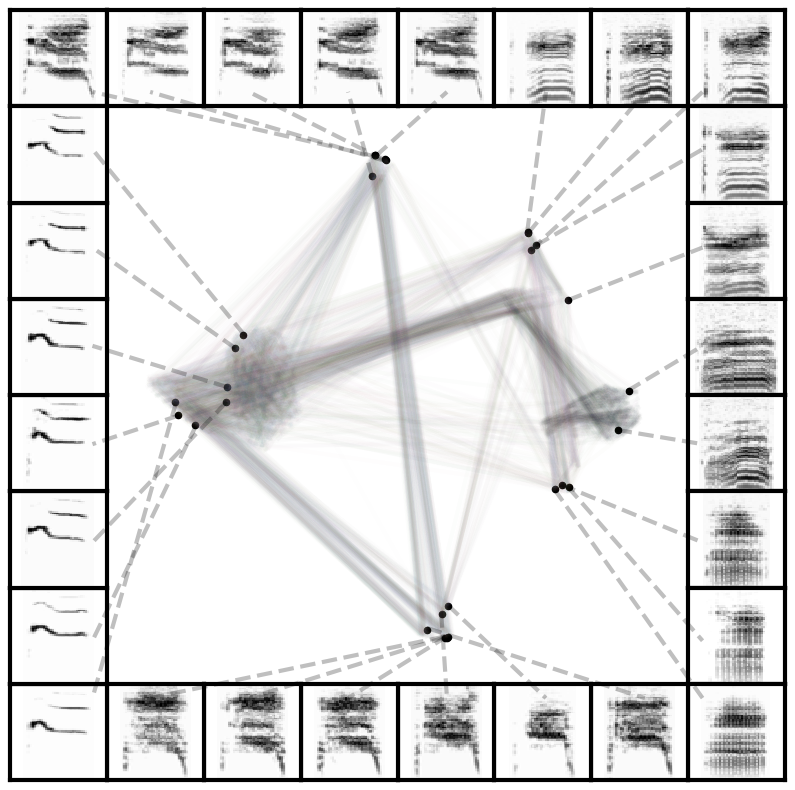

  0%|          | 0/441 [00:00<?, ?it/s]

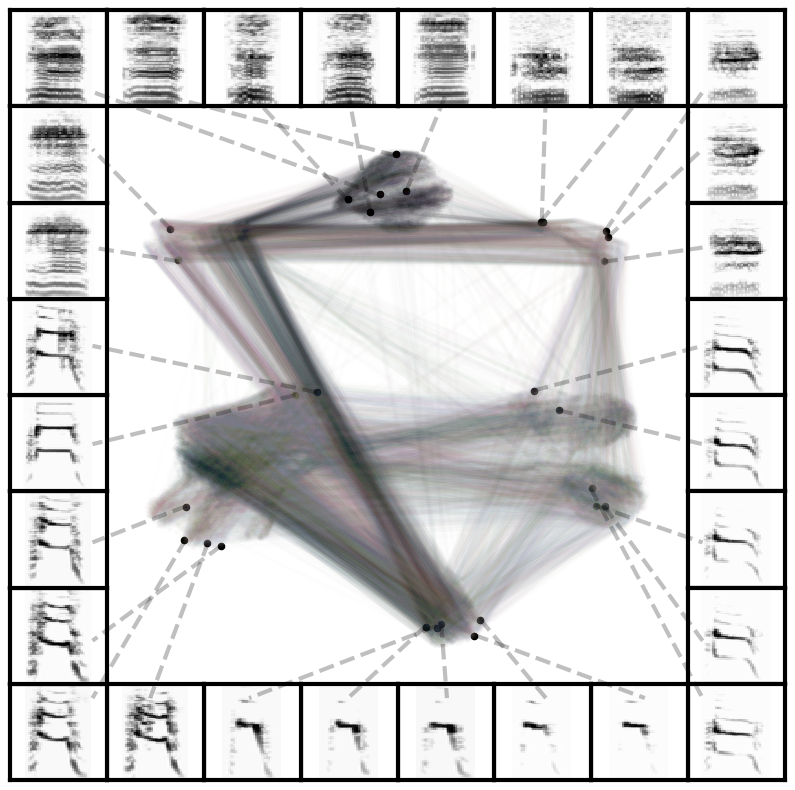

  0%|          | 0/315 [00:00<?, ?it/s]

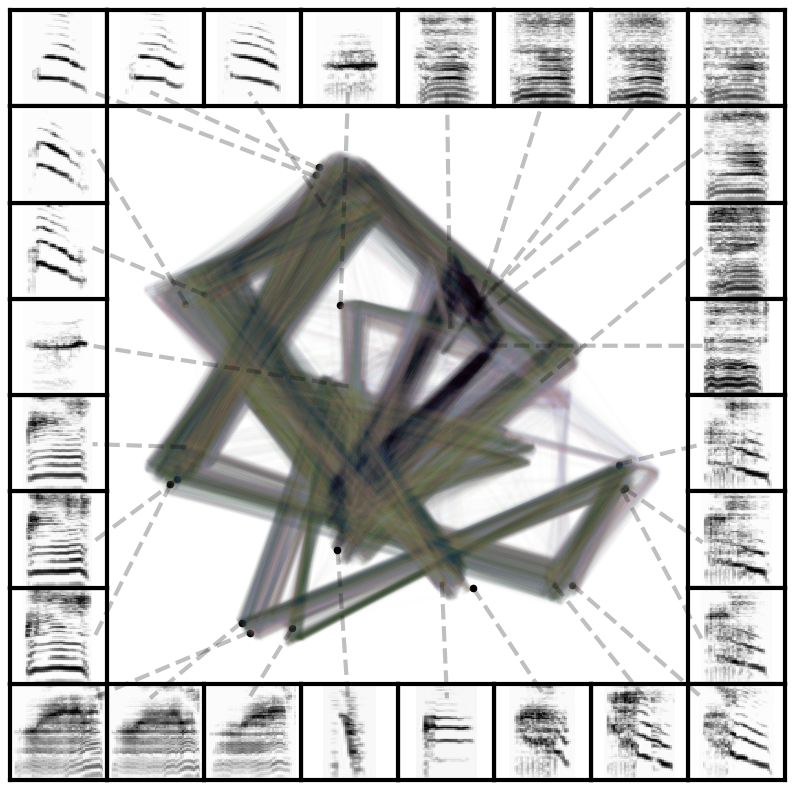

In [13]:
for indv in tqdm(syllable_df.indv.unique()[:3]):
    indv_df = syllable_df[syllable_df.indv == indv]
    
    
    fig, axs, main_ax, [xmin, xmax, ymin, ymax] = scatter_spec(
        np.vstack(indv_df.umap.values),
        indv_df.spectrogram.values,
        column_size=8,
        pal_color="tab20",
        color_points=False,
        enlarge_points=20,
        figsize=(10, 10),
        scatter_kwargs = {
            'alpha':0.25,
            's': 1,
            'show_legend': False
        },
        matshow_kwargs = {
            'cmap': plt.cm.Greys
        },
        line_kwargs = {
            'lw':3,
            'ls':"dashed",
            'alpha':0.25,
        },
        draw_lines=True,
        n_subset= 1000,
        border_line_width = 3,
        show_scatter=False,
    );
    
    draw_projection_transitions(
            np.vstack(indv_df.umap.values),
            indv_df.syllables_sequence_id.values,
            indv_df.syllables_sequence_pos.values,
            ax=main_ax,
            alpha=0.01,
        )
    plt.show()